In [1]:
# importing packages
import pandas as pd
import json
import seaborn as sns; sns.set() # has to be installed
import matplotlib.pyplot as plt

In [2]:
# creating dataframe from epochs in json file
with open("exchange_base/tracking_test3_val_result.json") as f:
    json_data = json.load(f)
df = pd.DataFrame(json_data['epochs']) 

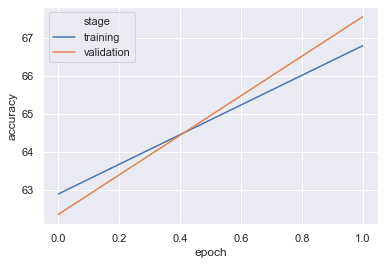

In [90]:
# plotting accuracy
ax = sns.lineplot(x="epoch", y="accuracy", hue="stage", data=df)

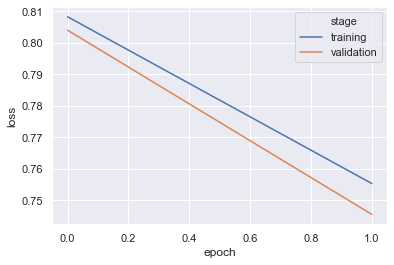

In [91]:
# plotting loss
ax = sns.lineplot(x="epoch", y="loss", hue="stage", data=df)

In [9]:
# Printing classification report for last epoch validation
classification_report_str = df[(df.epoch==df.epoch.max()) & (df.stage=='validation')].classification_report_str.values

In [30]:
print('|'+ classification_report_str[0], sep="")

|              precision    recall  f1-score   support

           0       0.91      0.02      0.04       966
           1       0.65      0.66      0.65      6969
           2       0.70      0.76      0.73      8678

    accuracy                           0.68     16613
   macro avg       0.75      0.48      0.47     16613
weighted avg       0.69      0.68      0.66     16613



In [94]:
# Printing classification report for last epoch validation
classification_report_str = df[(df.epoch==df.epoch.max()) & (df.stage=='validation')].classification_report_str.to_string()

In [95]:
test = """Lorem ipsum dolor sit amet, egestas quam eu, laoreet sapien rutrum lectus vel. Tellus pharetra torquent neque luctus ullamcorper vel, rutrum non dis varius vel auctor amet, rutrum condimentum arcu felis. Risus donec odio conubia tortor erat vivamus, tortor dictumst ultricies nonummy eu ridiculus, quis nunc maiores erat. Mattis pharetra in per nonummy elit nunc, sagittis purus semper augue eget eros. Dolor a, ac luctus sem aliquam fermentum, purus sodales, luctus purus amet. Dolor sit neque sed a sed urna.

Urna massa in dapibus in, arcu eget cubilia diam posuere, pede in, in etiam suscipit in erat proin, elementum arcu massa. Mollis lorem, nulla eget ridiculus odio turpis amet. Cras porro libero elit at sed, odio aliquam purus. Adipiscing venenatis et, cursus porttitor inceptos morbi viverra amet. Dolor elit sed ipsum quis dictum, odio aliquet pede sollicitudin. Ante nullam vel nostra sit, cursus nec imperdiet. Culpa massa ligula volutpat turpis viverra. Scelerisque nec semper massa dolor minim, rutrum tempor suspendisse et in condimentum, nemo sed, placerat lectus donec mollis ac. Venenatis neque integer velit suspendisse fusce dictumst.

Proin ipsum fermentum a praesent cursus, sapien nulla rutrum eleifend odio nibh metus, suspendisse amet ultrices dictum, ligula turpis fringilla sem ipsum nulla, tellus pellentesque et incidunt. Pharetra tortor pretium ut in suspendisse. Amet sed vehicula quam turpis quis. In vitae risus vestibulum sit porttitor. Donec rutrum quis aenean id sociis, duis nulla quia ligula, mollis augue in ac ipsum, id nostra ac, fusce sit. Ac non. Erat nam gravida risus mauris ut, vulputate nulla mi pellentesque, ac facilisi mollis aliquam. Consequat auctor et suspendisse at non, morbi ut sem tristique amet turpis, donec fringilla sed vestibulum, metus morbi gravida nulla, nulla dui lectus elementum. Et nibh."""

In [96]:
print(test)

Lorem ipsum dolor sit amet, egestas quam eu, laoreet sapien rutrum lectus vel. Tellus pharetra torquent neque luctus ullamcorper vel, rutrum non dis varius vel auctor amet, rutrum condimentum arcu felis. Risus donec odio conubia tortor erat vivamus, tortor dictumst ultricies nonummy eu ridiculus, quis nunc maiores erat. Mattis pharetra in per nonummy elit nunc, sagittis purus semper augue eget eros. Dolor a, ac luctus sem aliquam fermentum, purus sodales, luctus purus amet. Dolor sit neque sed a sed urna.

Urna massa in dapibus in, arcu eget cubilia diam posuere, pede in, in etiam suscipit in erat proin, elementum arcu massa. Mollis lorem, nulla eget ridiculus odio turpis amet. Cras porro libero elit at sed, odio aliquam purus. Adipiscing venenatis et, cursus porttitor inceptos morbi viverra amet. Dolor elit sed ipsum quis dictum, odio aliquet pede sollicitudin. Ante nullam vel nostra sit, cursus nec imperdiet. Culpa massa ligula volutpat turpis viverra. Scelerisque nec semper massa do